In [1]:
import pandas as pd
import os
from pprint import pprint
import googlemaps
import requests
import numpy as np
import altair as alt
from vega_datasets import data

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

### LOAD THE DATASET

In [38]:
# Load the dataset
df = pd.read_json('../data/winemag-data-130k-v2.json')

### FILTER ROWS BY COUNTRY (Include Only US)

In [39]:
df = df.query("country == 'US'")

### DO PRELIMINARY ANALYSIS ON US DATAFRAME

In [40]:
print("The dataframe columns are:")
pprint(list(df.columns))

The dataframe columns are:
['points',
 'title',
 'description',
 'taster_name',
 'taster_twitter_handle',
 'price',
 'designation',
 'variety',
 'region_1',
 'region_2',
 'province',
 'country',
 'winery']


In [41]:
print("There are {:,.0f} total ratings.\n".format(len(df)))
print(f"There are {len(df.country.unique())} unique countries represented.\n")
print(f"There are {len(df.province.unique())} unique provinces represented.\n")
print(f"There are {len(df.region_1.unique())} unique region 1's represented.\n")
print(f"There are {len(df.region_2.unique())} unique region 2's represented.\n")
print(f"There are {len(df.variety.unique())} unique varieties.\n")
print("There are {:,.0f} unique wineries.\n".format(len(df.winery.unique())))
print(f"There are {len(df.taster_name.unique())} tasters.\n")
print("The price ranges from ${:,.0f} to ${:,.0f} per bottle.\n".format(df.price.min(), df.price.max()))
print("The average price is ${:,.0f} per bottle.\n".format(df.price.mean()))
print("The points range from {:,.0f} to {:,.0f} per bottle.\n".format(df.points.min(), df.points.max()))
print("The average point rating is {:,.0f} per bottle.\n".format(df.points.mean()))

There are 54,504 total ratings.

There are 1 unique countries represented.

There are 27 unique provinces represented.

There are 265 unique region 1's represented.

There are 18 unique region 2's represented.

There are 257 unique varieties.

There are 5,375 unique wineries.

There are 16 tasters.

The price ranges from $4 to $2,013 per bottle.

The average price is $37 per bottle.

The points range from 80 to 100 per bottle.

The average point rating is 89 per bottle.



### SPECIFY GOOGLE MAPS API KEY

In [ ]:
gmaps = googlemaps.Client(key='ADD_YOUR_API_KEY_HERE')

### ADD THE COUNTIES TO EACH ROW USING GOOGLE MAPS API 
##### Uncomment to run - takes a long time...

In [ ]:
# wineries = {}
# for winery in list(df.winery.unique()):
#     geocode_result = gmaps.geocode(winery + ' Winery')
#     try:
#         for component in geocode_result[0]['address_components']:
#             if component['types'][0] == 'administrative_area_level_2':
#                 wineries[winery] = component['long_name']
#     except:
#         print("No geolocation for", winery)

### MERGE THE COUNTIES DATAFRAME TO DF AND SAVE TO CSV
#### This will remove rows without a matched country

In [ ]:
wineries_df = pd.DataFrame([wineries])
wineries_df = wineries_df.melt(var_name = 'winery', value_name = 'county')
merged_df = df.merge(wineries_df, on='winery')

# Save to csv
merged_df.to_csv('../data/us_wineries_with_counties.csv')

### LOAD THE MERGED DF FROM CSV

In [82]:
merged_df = pd.read_csv('../data/us_wineries_with_counties.csv')

### CLEAN THE MISLABELED COLUMNS
##### "America" and "Washington-Oregon"

In [83]:
merged_df.loc[(merged_df['county'] == 'Yamhill County') & (merged_df['province'] == 'America'), 'province'] = 'Oregon'
merged_df.loc[(merged_df['county'] == 'Bernalillo County') & (merged_df['province'] == 'America'), 'province'] = 'New Mexico'
merged_df.loc[(merged_df['county'] == 'Buncombe County') & (merged_df['province'] == 'America'), 'province'] = 'North Carolina'
merged_df.loc[(merged_df['county'] == 'Steuben County') & (merged_df['province'] == 'America'), 'province'] = 'New York'
merged_df.loc[(merged_df['county'] == 'Canyon County') & (merged_df['province'] == 'America'), 'province'] = 'Idaho'
merged_df.loc[(merged_df['county'] == 'Santa Barbara County') & (merged_df['province'] == 'America'), 'province'] = 'California'
merged_df.loc[(merged_df['county'] == 'Benton County') & (merged_df['province'] == 'America'), 'province'] = 'Washington'
merged_df.loc[(merged_df['county'] == 'Yavapai County') & (merged_df['province'] == 'America'), 'province'] = 'Arizona'
merged_df.loc[(merged_df['county'] == 'King County') & (merged_df['province'] == 'America'), 'province'] = 'Washington'
merged_df.loc[(merged_df['county'] == 'St. Charles County') & (merged_df['province'] == 'America'), 'province'] = 'Missouri'
merged_df.loc[(merged_df['county'] == 'Barnstable County') & (merged_df['province'] == 'America'), 'province'] = 'Massachusetts'
merged_df.loc[(merged_df['county'] == 'Gem County') & (merged_df['province'] == 'America'), 'province'] = 'Idaho'
merged_df.loc[(merged_df['county'] == 'Culpeper County') & (merged_df['province'] == 'America'), 'province'] = 'Virginia'
merged_df.loc[(merged_df['county'] == 'Washington County') & (merged_df['province'] == 'America'), 'province'] = 'Oregon'
merged_df.loc[(merged_df['county'] == 'Denver County') & (merged_df['province'] == 'America'), 'province'] = 'Colorado'
merged_df.loc[(merged_df['county'] == 'Nez Perce County') & (merged_df['province'] == 'America'), 'province'] = 'Idaho'
merged_df.loc[(merged_df['county'] == 'Worcester County') & (merged_df['province'] == 'America'), 'province'] = 'Maryland'
merged_df.loc[(merged_df['county'] == 'Barrow County') & (merged_df['province'] == 'America'), 'province'] = 'Georgia'
merged_df.loc[(merged_df['county'] == 'Sonoma County') & (merged_df['province'] == 'America'), 'province'] = 'California'
merged_df.loc[(merged_df['county'] == 'Windham County') & (merged_df['province'] == 'America'), 'province'] = 'Vermont'
merged_df.loc[(merged_df['county'] == 'Polk County') & (merged_df['province'] == 'America'), 'province'] = 'Florida'
merged_df.loc[(merged_df['county'] == 'Napa County') & (merged_df['province'] == 'America'), 'province'] = 'California'
merged_df.loc[(merged_df['county'] == 'Warren County') & (merged_df['province'] == 'America'), 'province'] = 'New York'
merged_df.loc[(merged_df['county'] == 'Jackson County') & (merged_df['province'] == 'America'), 'province'] = 'Illinois'
merged_df.loc[(merged_df['county'] == 'Monroe County') & (merged_df['province'] == 'America'), 'province'] = 'Indiana'
merged_df.loc[(merged_df['county'] == 'Cook County') & (merged_df['province'] == 'Washington-Oregon'), 'province'] = 'Washington'
merged_df.loc[(merged_df['county'] == 'Lane County') & (merged_df['province'] == 'Washington-Oregon'), 'province'] = 'Oregon'
merged_df.loc[(merged_df['county'] == 'Yamhill County') & (merged_df['province'] == 'Washington-Oregon'), 'province'] = 'Oregon'
merged_df.loc[(merged_df['county'] == 'Multnomah County') & (merged_df['province'] == 'Washington-Oregon'), 'province'] = 'Oregon'

### GET THE US-ATLAS COUNTY AND STATE IDENTIFIERS
##### Reference: https://github.com/topojson/us-atlas

In [84]:
# Get Counties
counties_url = 'https://cdn.jsdelivr.net/npm/us-atlas@3/counties-10m.json'
counties = requests.get(counties_url)
counties_data = counties.json()

# Get States
states_url = 'https://cdn.jsdelivr.net/npm/us-atlas@3/states-10m.json'
states = requests.get(states_url)
states_data = states.json()

### MAP THE COUNTY AND STATE IDS TO THE MERGED DF
##### This can take several minutes to run

In [85]:
# Get the list of geometry dictionaries which contain county/state name and ID
counties = counties_data['objects']['counties']['geometries']
states = states_data['objects']['states']['geometries']

def extract_ids(identifier, _type):
    """
    Get a dictionary of the state/county name and corresponding id.
    
    Parameters:
    -----------
    identifier -- (dict) state or county dictionary with name and id
    _type -- (str) either 'county' or 'state' as a string.
    
    Returns a dictionary of mapped state/county names and ids.
    """
    data = {}
    for item in identifier:
        # Remove leading '0' for correct mapping later
        if item['id'][0] == '0':
            item['id'] = item['id'][1:]
        if _type == 'county':
            if data.get(item['properties']['name'], None):
                data[item['properties']['name']].append(item['id'])
            else:
                data[item['properties']['name']] = [item['id']]
        else:
            data[item['properties']['name']] = item['id']
    return data

# Get the states and counties dicts
counties_dict = extract_ids(counties, 'county')
states_dict = extract_ids(states, 'state')

# Add an 'id' columns to the df for state and county
merged_df['county_id'] = np.nan
merged_df['state_id'] = np.nan

# Rename the 'province' column to 'state'
merged_df = merged_df.rename(columns={'province': 'state'})

# Copy the df to iterate over and add ids
merged_copy = merged_df.copy()

# Add county id's to merged df row by county name
for i, row in merged_copy.iterrows():
    county = row['county'].replace(' County', '')
    state = row['state']
    
    # Continue if state or county can't be matched
#     if counties_dict.get(county, None) is None:
#         continue
    if states_dict.get(state, None) is None:
        continue
    
    
    # Match the state_id
    merged_df.loc[i, 'state_id'] = states_dict[state]
    merged_df.loc[i, 'state'] = state
    
    
    # Match the county_id with the correct state
    if len(counties_dict[county]) == 1:
        merged_df.loc[i, 'county_id'] = counties_dict[county][0]
    else:
        for _id in counties_dict[county]:
            if _id[:len(states_dict[state])] == states_dict[state]:
                merged_df.loc[i, 'county_id'] = _id

KeyError: 'Greater Vancouver'

### CLEAN DATA WITH MISSING COUNTY ID's
##### Some counties weren't valid and were not in the US.

In [52]:
merged_df = merged_df[pd.notnull(merged_df['county_id'])]

### ANALYSE THE FILTERED AND CLEANED DF

In [53]:
print("There are {:,.0f} total ratings.\n".format(len(merged_df)))
print(f"There are {len(merged_df.country.unique())} unique countries represented.\n")
print(f"There are {len(merged_df.state.unique())} unique states represented.\n")
print(f"There are {len(merged_df.region_1.unique())} unique region 1's represented.\n")
print(f"There are {len(merged_df.region_2.unique())} unique region 2's represented.\n")
print(f"There are {len(merged_df.variety.unique())} unique varieties.\n")
print("There are {:,.0f} unique wineries.\n".format(len(merged_df.winery.unique())))
print(f"There are {len(merged_df.taster_name.unique())} tasters.\n")
print("The price ranges from ${:,.0f} to ${:,.0f} per bottle.\n".format(merged_df.price.min(), merged_df.price.max()))
print("The average price is ${:,.0f} per bottle.\n".format(merged_df.price.mean()))
print("The points range from {:,.0f} to {:,.0f} per bottle.\n".format(merged_df.points.min(), merged_df.points.max()))
print("The average point rating is {:,.0f} per bottle.\n".format(merged_df.points.mean()))
print(f"There are {merged_df.region_1.isna().sum()} missing values in region_1\n")
print("There are {:,.0f} missing values in region_2\n".format(merged_df.region_2.isna().sum()))

There are 0 total ratings.

There are 0 unique countries represented.



AttributeError: 'DataFrame' object has no attribute 'unique'

### ADD A VALUE COLUMN

In [54]:
merged_df['value'] = merged_df['points'] / merged_df['price']

### DISPLAY THE CHOROPLETH MAP OF US

In [55]:
alt.data_transformers.disable_max_rows()

counties = alt.topo_feature(data.us_10m.url, 'counties')

alt.Chart(counties).mark_geoshape().encode(
    color='points:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(merged_df, 'county_id', ['points'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

### DISPLAY CHOROPLETH MAP OF PARTICULAR STATE

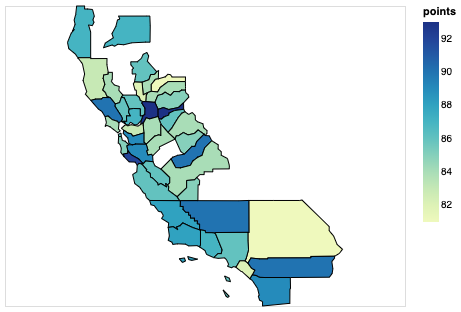

In [36]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

state_id = 6 #California = 6

map_state =(
    alt.Chart(counties)
    .mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
        color='points:Q')
    .transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==state_id)
    .transform_lookup(
        lookup='id',
        from_=alt.LookupData(merged_df, 'county_id', ['points']))

)

map_state

In [37]:
# drop bad index col before saving
merged_df = merged_df.iloc[:,1:]
merged_df.to_csv('../data/cleaned_data.csv')